第一个NeuralNetwork模块，用的是线性回归

https://youtu.be/Z_ikDlimN6A?t=17920

[Gradient descent, how neural networks learn | Chapter 2, Deep learning](https://www.youtube.com/watch?v=IHZwWFHWa-w&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=2&ab_channel=3Blue1Brown)

[5分钟深度学习 #02 反向传播算法](https://www.bilibili.com/video/BV1yG411x7Cc/?spm_id_from=333.788&vd_source=4b31946931a7c038ee64bc9619104ec0)

In [184]:
import torch
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
    
    # forward propagation
    def forward(self, x):
        return self.weight * x + self.bias

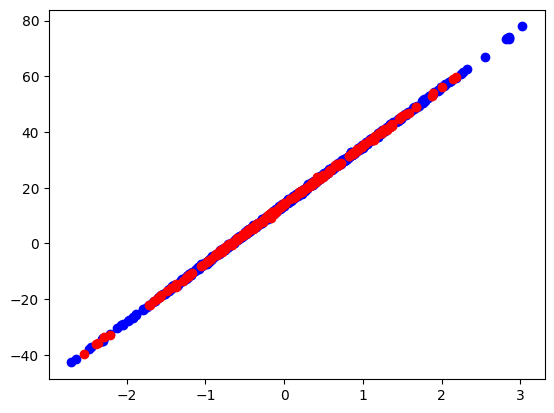

In [185]:
import matplotlib.pyplot as plt

# set hyperparameters
w = 21
b = 14
num_data = 1000
noise = 0.3

# get linear regression data, y = wx + b + noise
x = torch.randn(num_data)
y = w * x + b + noise * torch.randn(num_data)

x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

# show data
plt.scatter(x_train, y_train, c='b', label='train')
plt.scatter(x_test, y_test, c='r', label='test')

In [186]:
# set a seed for reproducibility
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

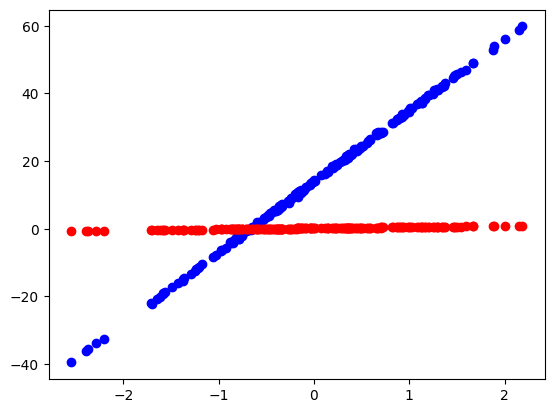

In [187]:
# predict with random parameters
with torch.inference_mode():
    y_predict = model_0(x_test)

# show prediction
plt.scatter(x_test, y_test, c='b', label='test')
plt.scatter(x_test, y_predict, c='r', label='predict')

# 这时候模型参数是随机的，所以预测的结果是随机的。预测效果不好。

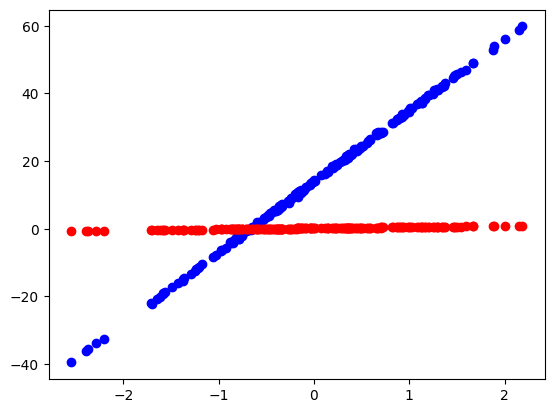

In [188]:
# predict with random parameters
with torch.no_grad():
    y_predict = model_0(x_test)

# show prediction
plt.scatter(x_test, y_test, c='b', label='test')
plt.scatter(x_test, y_predict, c='r', label='predict')


In [189]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [190]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

Epoch 0, loss 19.590526580810547
weight 0.39628082513809204, bias 0.18130940198898315
Epoch 100, loss 13.329995155334473
weight 6.476057052612305, bias 5.242559909820557
Epoch 200, loss 7.18605899810791
weight 12.884124755859375, bias 9.750556945800781
Epoch 300, loss 1.1950616836547852
weight 19.64902114868164, bias 13.493547439575195
Epoch 400, loss 0.23904655873775482
weight 20.993305206298828, bias 13.9796724319458
Epoch 500, loss 0.23904642462730408
weight 20.99297332763672, bias 13.979422569274902
Epoch 600, loss 0.2390466183423996
weight 20.993127822875977, bias 13.979422569274902
Epoch 700, loss 0.23904670774936676
weight 20.993270874023438, bias 13.9796724319458
Epoch 800, loss 0.2390463948249817
weight 20.992938995361328, bias 13.979422569274902
Epoch 900, loss 0.2390465885400772
weight 20.993093490600586, bias 13.979422569274902


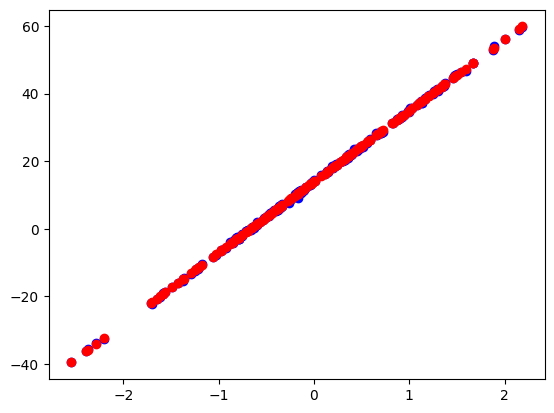

In [191]:
# begin to train
for epoch in range(1000):
    # forward propagation
    y_predict = model_0(x_train)

    # calculate loss
    loss = loss_fn(y_predict, y_train)

    # backward propagation
    loss.backward()

    # update parameters
    optimizer.step()

    # clear gradients
    optimizer.zero_grad()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, loss {loss.item()}')
        print(f'weight {model_0.weight.item()}, bias {model_0.bias.item()}')

# predict with trained parameters
with torch.no_grad():
    y_predict = model_0(x_test)

# show prediction
plt.scatter(x_test, y_test, c='b', label='test')
plt.scatter(x_test, y_predict, c='r', label='predict')